In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
df=pd.read_csv("Churn_Modelling.csv")

In [48]:
df.shape

(10000, 14)

In [49]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [51]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [52]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [53]:
df.isnull().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [54]:
df.drop(['RowNumber','Surname','CustomerId'], axis=1, inplace=True)

In [55]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(f'{col}: {df[col].unique()}')

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [56]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col].replace({'Female': 1, 'Male': 0}, inplace=True)
        

df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [57]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Geography']

In [58]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [59]:
!pip install category_encoders

In [60]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['Geography'])
df=encoder.fit_transform(df)

In [61]:
df.dtypes

CreditScore          int64
Geography_1          int64
Geography_2          int64
Geography_3          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [62]:
#split the dataset into input features and target column
x=df.drop("Exited",axis=1)
y=df["Exited"]

In [63]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

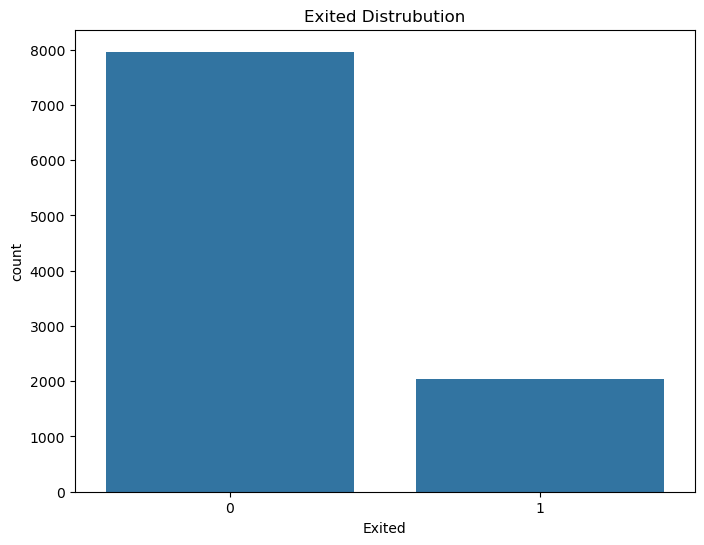

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df)
plt.title('Exited Distrubution')
plt.show()

In [65]:
x.head()

,CreditScore,Geography_1,Geography_2,Geography_3,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,0,0,1,42,2,0.00,1,1,1,101348.88
1,608,0,1,0,1,41,1,83807.86,1,0,1,112542.58
2,502,1,0,0,1,42,8,159660.80,3,1,0,113931.57
3,699,1,0,0,1,39,1,0.00,2,0,0,93826.63
4,850,0,1,0,1,43,2,125510.82,1,1,1,79084.10


In [66]:
# split the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
x_train.shape,y_train.shape

((8000, 12), (8000,))

In [68]:
x_test.shape,y_test.shape

((2000, 12), (2000,))

In [69]:
#Build an FNN Model
!pip install tensorflow

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [71]:
#build the model
model=tf.keras.Sequential([
    keras.layers.Dense(24,input_shape=(12,),activation='relu'),
    keras.layers.Dense(12,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')])

In [72]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
# Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6564 - loss: 810.1777 
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6643 - loss: 70.8475
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6697 - loss: 65.8451
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6700 - loss: 69.5162
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6755 - loss: 54.5861
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6814 - loss: 56.4199
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6764 - loss: 59.0576
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6841 - loss: 43.2351
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6865 - loss: 50.2628
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6811 - loss: 52.1166


In [74]:
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: 13.0279 


[13.027904510498047, 0.7085000276565552]

In [75]:
# View weights and biases for each layer
for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()
    print(weights)
    print()
    print("\n")

[[ 3.82448286e-01  8.82111117e-02  4.21414256e-01  3.93645023e-04
  -4.09480333e-01 -1.23061843e-01  3.39049518e-01 -1.98523119e-01
   2.20547155e-01 -2.90765971e-01 -2.08078414e-01 -8.03496987e-02
   1.78514287e-01 -1.06152095e-01  7.17965066e-02  4.27672118e-02
  -4.87244502e-02  1.87129378e-01  2.70771682e-01 -1.06416516e-01
  -2.04107508e-01  2.94367850e-01 -4.83075589e-01  6.22292124e-02]
 [-2.84109861e-01  1.52635112e-01  5.62509336e-02  4.36304867e-01
  -1.45626888e-01 -6.14896238e-01  6.95856661e-02  6.18262589e-01
  -4.07981455e-01 -2.48168200e-01 -4.03663874e-01 -1.24501936e-01
  -3.42888445e-01  8.87955166e-03  1.95946731e-02  6.82228506e-01
   1.80247366e-01  2.29059175e-01  8.32983434e-01 -4.80260819e-01
  -8.67450237e-02  1.28056854e-01 -3.85006309e-01  1.15886517e-02]
 [-1.53523505e-01  2.12222040e-01  2.79714733e-01  2.13453263e-01
   7.41245747e-02  2.29599625e-01  7.78108984e-02 -1.10962205e-01
   1.53926220e-02 -4.64754790e-01 -2.71191984e-01  2.61725605e-01
   1.688

In [77]:
# View weights and biases for each layer
for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()
    print(biases)
    print()
    print("\n")

[ 0.174232   -0.03270308  0.06126085  0.07675634 -0.14466518 -0.1280286
  0.11484813  0.13627748 -0.0866125  -0.1351821  -0.03487907 -0.09510551
 -0.10548006 -0.10874727  0.02489361  0.08072561  0.06509333  0.03646018
  0.05298074 -0.05887545  0.         -0.04024985 -0.09009351 -0.12303381]



[ 5.34165204e-02  8.84486511e-02  0.00000000e+00  1.82195674e-06
 -7.87121132e-02 -1.24814752e-02  0.00000000e+00  1.04923859e-01
 -1.07584916e-01  1.01576500e-01 -4.80259620e-02 -5.17333634e-02]



[-0.10889527]





In [78]:
# Make predictions
y_pred = model.predict(x_test)

# Convert probabilities to binary (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Compute confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_classes)

print("Confusion Matrix:\n", cm)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 tf.Tensor(
[[1298  309]
 [ 274  119]], shape=(2, 2), dtype=int32)


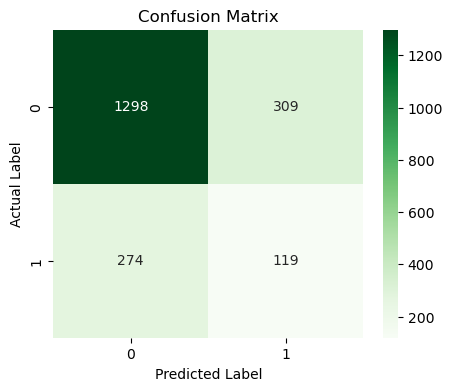

In [79]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()